<h1 align="center"><font color = "firebrick">Supervised ML - Simple and Multiple Regressions</h3> 

Linear regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things: 
1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  

The simplest form of the regression equation with one dependent and one independent variable is defined by the formula shown below:

<img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2018/08/linear-regression-equation-explained.png" width="400">


Three major uses for regression analysis are:
1. determining the strength of predictors, 
2. forecasting an effect, and 
3. trend forecasting.

# 1. Business Problem

As a real-estate consultant/analyst, you want to understand on what factors sales price of a house depends. Based on the analysis, you want to predict the the price of a house given various details about it such as lot area, overall quality of the house, year in which it was built, number of bathrooms etc.

# 2. Data import 

### Loading the required libraries

It's a good practice that we import all required libraries in the beginning of the notebook. However, in this course, we will import the libraries when they are required in the middle of the notebooks. It is done to give you an idea at which step we need which library/function.

In [3]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [4]:
# Load in the data
url = "https://bit.ly/316tYZT"
df = pd.read_csv(url)

##### Some terminologies that we use in machine learning or data science work:

**1. Table**: dataframe, data, dataset, or any specific name that we assign.<br>
**2. Columns**: variables, parameters<br>
**3. Input columns**: input variables, input variables, predictor, **independent** or **response** variables, features (in classification problems)<br>
**4. Output column**: output variable, output variable, outcome, **dependent** or **target** variables, labels (in classification problems)<br>
**5. EDA**: Exploratory data analysis, mostly visually analysing the data<br>
**6. Model**: The machine learning model/algorithm/program that we are going to use on the dataset to predict something<br>
**7. Performance**: Defining "how well the model is predicting?" is done through model performance evaluation.<br>
**8. Performance metric**: Names of some calculations/functions using which we try to quantify the performance of the model.<br>
**9. Hyperparameter tuning**: Sometimes, to improve the performance of the model, we try to change some paramters and then compare if there is any improvement. This is called hyperparameter tuning.<br> 
Simple example, in the previous course, you have learnt how to create bar charts. The default color of the cars are <font color = "blue"> blue </font> which can be changed to <font color = "red"> red </font> using a parameter called `color`.

# 3. Data Understanding

### Basic exploration


There are various methods to understand data which you have learn in the previous course. We are going to use some of those here.

In [5]:
# Understanding data in different ways

print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum())

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe())



Dimension of the data: (2925, 11)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  SalePrice       2925 non-null   int64
dtypes: int64(11)
memory usage: 251.5 KB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


#### Observations from basic exploration:
1. There are total 2926 records/rows and 11 columns in the dataset.
2. All columns contain `integer` values. We can use all columns (if required) for regression analysis as all are numeric.
3. There is no missing value in any row/column. Hence, no need to treat the missing values.
4. Descriptive statistics can be interpreted for each column. You can try to go one by one. 

### Correlation analysis


In [ ]:
# Correlation matrix


In [ ]:
# Let's plot the correlation matrix as a heatmap



Since there are many columns, let's just arrange the correlation matrix in a way that we see the correaltion values from highest to smallest.

Please note that the heatmap actually contains duplicate values i.e. the value on left diagonal are same as the value on right diagnonal. Hence, we will not include the duplicates from our next output.

In [ ]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

In [ ]:
df.corr().unstack().sort_values(ascending = False)['SalePrice']

Sometimes, you may want to see the output in matrix form while fitlering the correlations which are **not significant**. 

In the below code cell, we are trying to filter or see only those correlation which are more than 0.5 (positive and negative, both), and not perfectly correlated where the columns  are being compared to the same.

We can also visualize these matrix as a heatmap like it has been done in the next output.

In [ ]:

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr > 0.5) | (dfCorr < -0.5)) & (dfCorr !=1.000)]
display(filteredDf)

plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True)
plt.show()

#### Overall observations from correlation analysis:
1. `SalePrice` is strongly positive correlated to `Overll Qual`
2. `SalePrice` is highly positive correlated to `Gr Liv Area` which refers to Ground Living Area, and `Garage Cars` which might be referring to cars occupancy in the garage.
3. There is medium correlation with `Year Built`, `Year Remod/Add`and `Full Bath`.

##### <font color = "red">How are we going to use this observation in our analysis?
    
- For Simple Linear Regression, we will use `Overall Qual` column.
- For Multiple Linear Regression, we will use all columns of the dataframe.
- For additional practice, you can rework on the Multiple Linear Regression taking only those columns which are mentioned in the observations above i.e. where the correlation is more than 0.5

There may be many others explorations that can be done on this dataset, depending on the need. For example, if we notice there are missing values in the dataframe, we dive deeper to understand missing values column-wise and perform steps to remove or replace those missing values. In the previous course, you have learnt many methods to visualize column with customized codes. 

### Visual analysis (EDA - Exploratory Data Analysis)

We have already visually observed the coorelation betweent the variables. There may be many other visual explroations that can be done.

To save our time and perform a quick understandnig of the columns, visually, let's use `dataprep` package that we had used in previous course. 

In [ ]:
from dataprep.eda import create_report

In [ ]:
# visualize the data


#### Overall observations from EDA:
Since our `target variables` is `SalesPrice`, we will focus only on it:
1. The SalesPrice is a little positive skewed. There are some sales prices which are on higher side compared to other values.
2. We will still consider SalesPrice as having normal distribution as its skewness is within the acceptable range of -2 ot +2.  <br>Refer: https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon?action=AttachFile&do=view&target=rulesofthumb.pdf
<br> Please note that different researchers may have different acceptable range for skewness. It all depends on what level of accuracy they need and how much resources they have to further clean the data to make it look normally distributed.
3. SalesProce has higher correlation with some of the columns which we have explored earlier in correlation analsysis.

# 4. Data Preparation

Data preparation is also called data cleaning, data transformation, data wrangling etc.

### Data Cleaning

A dirty data can contain a lot of issue and may srongly impact our data analysis and predictive modelling. It may contain incorrect, inconsistent, incomplete or duplicate data, or some other issues as well which should definitely be taken care of.

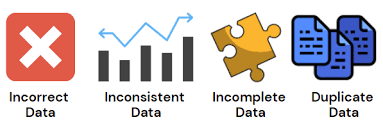


In our dataset, we do not have these issues. Later, while working on some other datasets, we will take care of these problems, if found. 

Read more on why data cleaning is important: https://www.javatpoint.com/data-preparation-in-machine-learning

### Feature Selection

We have a lot of features/columns in our data. We will selection only those columns which are to be used in the analysis or data modelling. This method is called feature selection.

<img src="https://mlxb3uasbvvi.i.optimole.com/w:640/h:362/q:mauto/f:avif/https://www.izen.ai/wp-content/uploads/2021/10/184.png"><br>


The feature selection will depend on the type of regression analysis we are going to do. 


# 5. Simple Linear Regression

### Objective and working of Simple Linear Regression

In Simple Linear Regression, we predict a dependent variable based on the values in an independent variable.

<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/04/Regression-Formula.jpg" width="500">

- Y = Our **target/output/dependent variable** which will be **`SalesPrice`** which are going to predict.<br>
- X = Our **predictor/input/independent variable** which will be **`Overall Qual`** which has the highest correlation with SalesPrice.
- a = Constant value or y-intercept
- b = slope or coefficient of X
- e = error

**Understanding the equation with regression line**

<img src="https://d2cyt36b7wnvt9.cloudfront.net/exams/wp-content/uploads/2022/04/29202209/PIC-248.png" width="500">



### Feature selection for Simple Linear Regression

In [ ]:
X =      # Taking only one column as input variable
y =      # We want to predict sales based on Overall Qual of the house.

# Two brackets given to put the data in dataframe format.
# If do not want to input as dataframe format then need to reshape the data,
# which we will do later.
# With single bracket, it will be Series format.

# Please note that we do not need to convert y to dataframe for the modelling.
# It can work as a Series too however, to calculate the accuracy score later, 
# we need it to be of same data type as of X.

In [ ]:
# Please note that the data type of x and y are dataframe.
print(type(X))
print(type(y))

### Train-Test Split

A train test split is when you split your data into a training set and a testing set. 

The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set.

<img src = "https://i.imgur.com/qOLmXIt.png" width="650">

Read the documentation for train_test_split(): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split 

In [ ]:
# Split the data into train and test



In [ ]:
# Printing some rows of splitted data just for exploration

print(X_train[0:5])
print(y_train[0:4])
print(X_test[0:4])
print(y_test[0:4])

# You will notice that our outputs may be different.
# Or, if you re-run the previous code for split and then run this cell
# then again the output will be different.
# This is because we have NOT used random_state while making the split.
# You can set random_state = 0 or any other integer to reproduce the same split.

### Training the model

In [ ]:
# importing the model

from sklearn.linear_model import LinearRegression # Algorithm or model

In [ ]:
# instantiating the model

slr_model = 

**<font color='red' > What is instantiating the model?**
    
Think of instantiating the model as creating a blueprint of the model/algorithm code in which new inputs will be given.
For example, many houses can be constructed based on a single blueprint of a house design.

Same way, we created a blueprint called `slr_model`.

In [ ]:
# fit() is used to pass training data to train the model

slr_model.fit

### Model Prediction

Now that the data has been trained on the training dataset (both input and output), we will now predict the the values for testing inputs, and then compare the predictions with actual output from testing data.

In [ ]:
# Predicting the values for testing inputs

y_pred = 

Let's compare the actual y (y_test) and predicted y (y_pred).

In [ ]:
display(y_test[0:10])
display(y_pred[0:10])

# We can clearly see there is some +ve or -ve difference between the actual and predicted.

We can also use any new value as input to predict the price.

In [ ]:
# Predicting price for overall quality = 7

newQuality = 7   

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newQuality).reshape(-1, 1)  # reshape(-1, 1) means and 1 column and unknown number of rows

# Predicting the price for the given input
slr_model.predict(newInput)

### Model Evaluation

It's always good to evaluate the model's performance. For Linear Regression models, the performance metrics can be many, namely:
1. Mean Squared Error
2. Mean Absolute Error
3. Root MSE
4. Accuracy score 

.. and many more. We will look into the commonly used MSE and Accuracy scores.

In [ ]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics 

##### Average error

In [ ]:
# Finding mean absolute error
metrics.mean_absolute_error()

It indicates that on an average, if the model predicts a price of a house based on overall quality, there may be an error of the value that appears above.

##### Model's accuracy

In [ ]:
accuracy_slr = 

print("Accuracy of the model is:", round(accuracy_slr*100), "%")

**Are you satisfied with the accuracy score of the model?**

So although we have developed a model to do prediction of price based on overall quality of the house, it appears that the predicted may not be good. 

This is because there may be many other factors which affect the price of a house. Example, all those column which had high correlation with price. 

To build a better model, we will later use the same dataset to perform **Multiple Linear Regression** where we will take other columns as well into consideration.

### Result Interpretation

Remember we discussed about the components of a regression equation? We are going to create an equation using the value from the model we have developed.

<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/04/Regression-Formula.jpg" width="500">

In [ ]:
# printing y intercept - 'a' in the above image

slr_model.

In [ ]:
# printing slope of dependent variable - 'b' in the above image

slr_model.

<font color = "red"> You already had the error value. Now you have the y-intercept and the slope of X as well. Can you write an equation based on equation </br> **Y = intercept + slope(X) + Error** ?

We got the equation that can be used manually too to predict the price of the house based on a single column - overall quality. Now, let's try to use all other columns of the dataset to predict Sale Price.

-------------------------------------------------
-------------------------------------------------


# 6. Multiple Linear Regression

### Objective and working of Multiple Linear Regression

In Multiple Linear Regression, we predict a dependent variable based on the values in multiple independent variable. In the below image, we are considering 3 independent variables hence, 3 X values.

<img src="https://cdn.wallstreetmojo.com/wp-content/uploads/2019/05/Multiple-Regression-Formula-1.jpg" width="500">

- Y = Our **target/output/dependent variable** which will be **`SalesPrice`** which are going to predict.<br>
- Xs = **predictor/input/independent variables**. For our model building, we will take all variables of the dataframe.
- a = Constant value or y-intercept
- m = slopes or coefficients of Xs. Please note that the slope of different inputs (Xs) may be different.
- e = error

**Understanding the equation with regression line**

Interpreting the gression plane or line of a multiple linear regression is difficult as our as our laptop screen will show 2D images. However, the below gif can help you visualize how the plane appears for a multiple linear regression which contains 3 input variables.

<img src="https://mediaproduction.adelaide.edu.au/public-assets/futurelearn/Data%20Analytics%20for%20Managers/Week%201%20-%20GIF/PS-3D-Representation-(1).gif" width="500">



### Feature selection for Multiple Linear Regression

In [ ]:
X =     # Drop the saleprice - everything else is the input
y =     # output

In [ ]:
# Please note that the data type of x and y will be dataframe.
print(type(X))
print(type(y))

### Train-Test Split

A train test split is when you split your data into a training set and a testing set. 

The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set.

<img src = "https://i.imgur.com/qOLmXIt.png" width="650">

Read the documentation for train_test_split(): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split 

In [ ]:
# Split the data into train and test



In [ ]:
# Printing some rows of splitted data just for exploration

display(X_train[0:5])
display(y_train[0:4])
display(X_test[0:4])
display(y_test[0:4])

# You will notice that our outputs may be different.
# Or, if you re-run the previous code for split and then run this cell
# then again the output will be different.
# This is because we have NOT used random_state while making the split.
# You can set random_state = 0 or any other integer to reproduce the same split.

### Training the model

In [ ]:
# importing the model

# no need to re-import it as we have already done it once in this notebook

from sklearn.linear_model import LinearRegression 

In [ ]:
# instantiating the model

mlr_model =       # similar code, just giving a different name to the model

**<font color='red' > What is instantiating the model?**
    
Think of instantiating the model as creating a blueprint of the model/algorithm code in which new inputs will be given.
For example, many houses can be constructed based on a single blueprint of a house design.

Same way, we created a blueprint called `slr_model`.

In [ ]:
# fit() is used to pass training data to train the model

mlr_model.fit

### Model Prediction

Now that the data has been trained on the training dataset (both inputs and output), we will now predict the the values for testing inputs, and then compare the predictions with actual output from testing data.

In [ ]:
# Predicting the values for testing inputs

y_pred = mlr_model.predict

Let's compare the actual y (y_test) and predicted y (y_pred).

In [ ]:
display(y_test[0:10])
display(y_pred[0:10])

# We can clearly see there is some +ve or -ve difference between the actual and predicted.

We can also use any new value as input to predict the price. Taking new values for 10 input column will take time so let's just take any random row from the data.

In [ ]:
display(X.iloc[5])
newData = X.iloc[5]   # Just taking any random column for predicting.

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newData).reshape(1, -1)  # reshape(1, -1) means and 1 row and unknown number of columns

# Predicting the price for the given input
prediction = mlr_model.predict(newInput)

print("The predicted Sale Price for the given 10 inputs is: ", prediction)

### Model Evaluation

It's always good to evaluate the model's performance. For Linear Regression models, the performance metrics can be many, namely:
1. Mean Squared Error
2. Mean Absolute Error
3. Root MSE
4. Accuracy score 

.. and many more. We will look into the commonly used MSE and Accuracy scores.

In [ ]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics

##### Average error

In [ ]:
# Finding mean absolute error
metrics.mean_absolute_error

It indicates that on an average, if the model predicts a price of a house based on overall quality, there may be an error of the value that appears above.

##### Model's accuracy

In [ ]:
accuracy_mlr = 

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")

**Is the accuracy better than that of Simple Linear Regression?**

If still not satisfied with the model accuracy and you want to see if it can be improved further, you can either:
1. Perform hyperparameter tuning i.e. change the default values of the model's parameters. You can get a list of such parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. Select the column as inputs which are more correlated to the Sales Price. We should avoid columns which are highly correlated with each other.

### Result Interpretation

Remember we discussed about the components of a regression equation? We are going to create an equation using the value from the model we have developed.

<img src="https://miro.medium.com/v2/resize:fit:1160/0*UitadBJZqrH0K1VQ.png" width="500">

In [ ]:
# printing y intercept 

mlr_model.

In [ ]:
# printing slope of dependent variable 
mlr_model.

In [ ]:
# Run this cell if you get scientific notations in the output of previous cell.
# And then go run the previous cell.

import numpy as np
np.set_printoptions(suppress=True)

<font color = "red"> You already had the error value. Now you have the y-intercept and the slope of X as well. Can you write an equation for this multiple linear regression?

# 7. Conclusion

We explored data science workflow consisting of several stages. 
We performed Simple and Multiple Linear Regression, and also did model evaluation based on some performance metrics. 

We observed that when we include more features/inputs to predict the sales prices of the house, the model tends to give higher accuracy. This, however, cannot be true for all cases. 

At times, when there are too many features, the model perform poorly as the regression equation becomes too complex and there are many independent variables.

There are some other algorithms as well which can be used for regression analysis. Please feel free to explore more datasets and algorithms on Kaggle and online resources.

-----------------------------------------------
-------------------------------------------------